In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [40]:
pred1 = pd.read_csv('Files/BiLSTM/additionalX_SP.csv', index_col=0)
pred1=pred1.iloc[:-2,:]
# pred2=pd.read_csv('Files/Backbone_BiLSTM_SP.csv', index_col=0)
gt = pd.read_csv('Database/spot_std/SP_vol.csv', index_col=0)
gt.index=pd.to_datetime(gt.index)

In [41]:
pred1.index = pd.to_datetime(pred1.index)

# pred1['Predictions'].iloc[0:-2].resample('W-MON').mean()

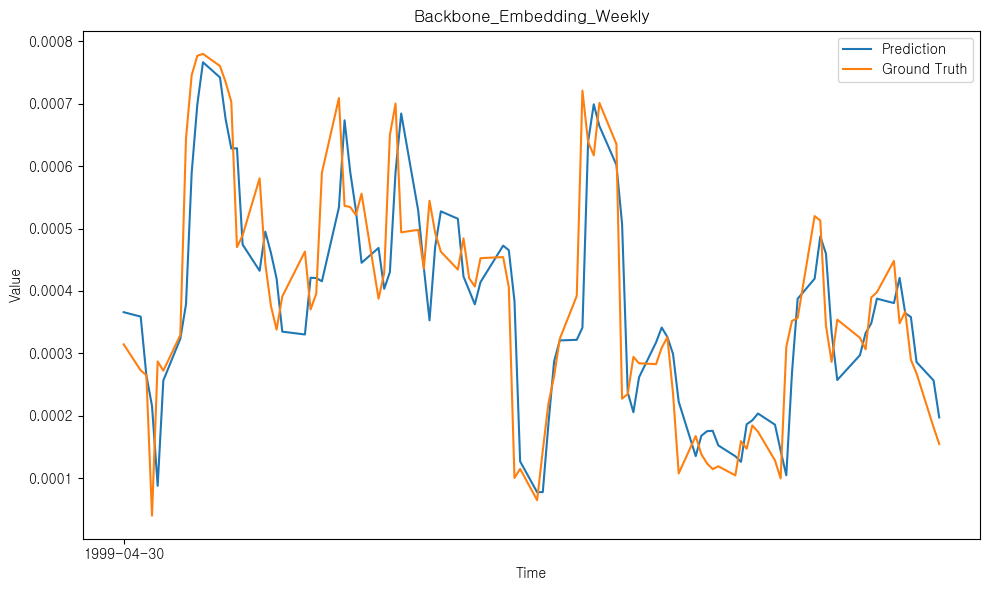

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(pred1['Predictions'].iloc[0:100]/100, label='Prediction')
plt.plot(pred1['Ground Truths'].iloc[0:100]/100, label='Ground Truth')
# plt.plot(gt.loc['1999-06-28':'2001-01-01'], label='Ground Truth')
plt.title('Backbone_Embedding_Weekly')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:100:100])
plt.tight_layout()
plt.show()

In [107]:
def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

In [40]:
gt = pred1.loc['2008-09-01':'2009-06-01', 'Ground Truths']
out = pred1.loc['2008-09-01':'2009-06-01', 'Predictions']

gt2 = pred1.loc[:'2008-09-01', 'Ground Truths']
out2 = pred1.loc[:'2008-09-01', 'Predictions']

In [41]:
print('뒤')
print(calculate_mae(gt.values, out.values))
print(calculate_rmse(gt.values, out.values))

뒤
0.009248051978283992
0.012251686861511566


In [42]:
print('앞')
print(calculate_mae(gt2.values, out2.values))
print(calculate_rmse(gt2.values, out2.values))

앞
0.002828648400117874
0.0038367011492073068


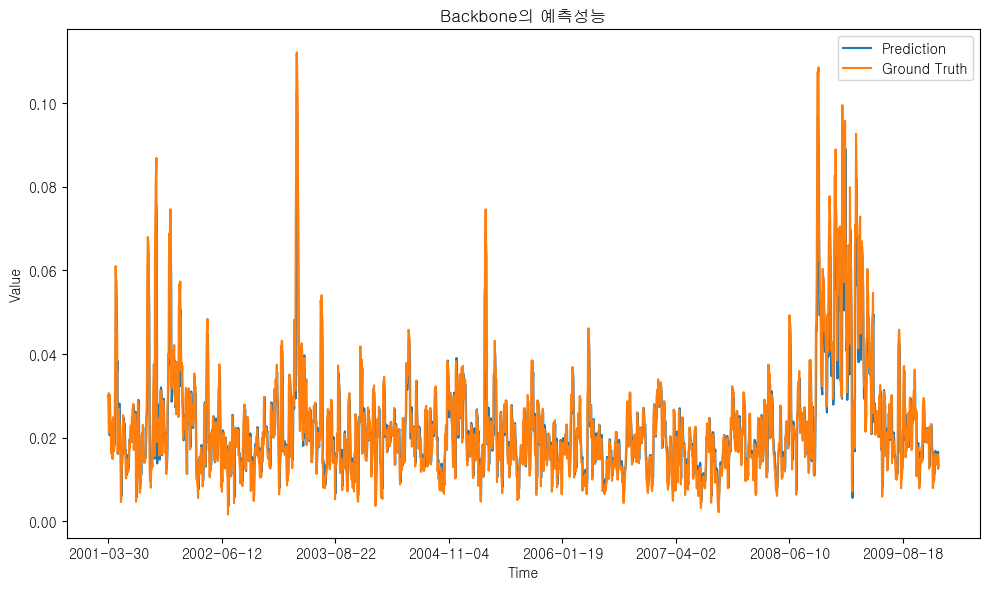

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(pred2['Predictions'].iloc[:-2], label='Prediction')
plt.plot(pred2['Ground Truths'].iloc[:-2], label='Ground Truth')
plt.title('Backbone의 예측성능')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred2.index[0:-1:300])
plt.tight_layout()
plt.show()